# Pre-Lecture

Question 1 

a. A Classification Decision Tree is a machine learning algorithm used to categorize data into discrete classes based on input features. It works by splitting data at decision points derived from feature values. Its simplicity and interpretability make it widely applicable in real-world scenarios. For instance, it can diagnose diseases based on symptoms, detect fraudulent transactions, filter spam emails, and classify customers by churn risk or preferences. Other applications include loan approval, student performance prediction, and animal behavior classification.

b. A Classification Decision Tree makes predictions by following a series of decisions or splits based on the input features. Each split divides the data into smaller groups, and as it reaches the end of the tree, it assigns a class label (e.g., "yes" or "no," "spam" or "not spam") based on the majority class in that group.

Multiple Linear Regression makes predictions by fitting a straight line to the data. It calculates a weighted sum of the input features and uses this sum to predict a continuous outcome (e.g., predicting a person's salary based on age and education level). The goal is to find the best-fitting line that minimizes the error between predicted and actual values.

Question 2

Accuracy can be used in email spam detection. It is useful for determining how well the model correctly identifies both spam and non-spam emails. High accuracy means the model is effectively classifying most emails, which is important as we don't want any important emails in the spam folder (false positive) or any spam emails in our inbox (false negative).

Sensitivity can be used in cancer detection. It is critical when the goal is to identify as many positive cases (cancer patients) as possible. A high sensitivity ensures that most cancer cases are detected, even if it leads to more false positives, because it is more dangerous to miss a cancer diagnosis than to falsely diagnose someone (as they might die).

Specificity can be used in fraud detection in credit card transactions. It is important in fraud detection, where we want to minimize false positives. High specificity ensures that legitimate transactions are correctly identified as non-fraudulent, avoiding unnecessary alarms, and as to not blame innocent people with commiting a crime. 

Precision can be used medical diagnosis for a rare disease. It is crucial when the cost of a false positive is high (possibly the life of a human). In rare disease diagnosis, a high precision means that when the model predicts a disease, it’s more likely to be correct, avoiding unnecessary treatments or tests.



ChatGPT summary:

In our chat, we covered several topics related to machine learning metrics and decision trees:

Classification Decision Tree: We discussed how a Classification Decision Tree categorizes data by making multiple decisions based on input features, making it useful for non-linear problems. Examples of real-world applications include disease diagnosis, fraud detection, and customer segmentation.

Non-linear Decision Boundary: Explained that a non-linear decision boundary is when the separation between classes isn't a straight line, and a decision tree handles this by making multiple splits, capturing complex patterns.

Classification Decision Tree vs. Multiple Linear Regression: We compared the two algorithms, noting that decision trees predict classes by splitting data at decision points, while multiple linear regression predicts continuous values by fitting a straight line to the data.

Metrics: We explored the real-world applications of different evaluation metrics:

Accuracy: Best for balanced datasets, such as spam detection.
Sensitivity: Important for detecting positive cases, like in cancer detection.
Specificity: Crucial when avoiding false positives, such as in fraud detection.
Precision: Key when false positives have high costs, like in rare disease diagnosis.
This conversation focused on understanding decision trees, evaluating models, and applying appropriate metrics to real-world scenarios.

https://chatgpt.com/share/673d8971-5650-8013-a4d6-f0a9bf6ad4a9

Question 3

In [8]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove specified columns
columns_to_remove = ["Weight_oz", "Width", "Height"]
ab_reduced = ab.drop(columns=columns_to_remove, errors="ignore")

# Drop all rows with NaN values and create a new copy
ab_reduced_noNaN = ab_reduced.dropna().copy()

# Ensure data types for specified columns
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)  # Correct column name
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display the resulting DataFrame with updated data types (optional)
print(ab_reduced_noNaN.dtypes)
print(ab_reduced_noNaN.head())


Title              object
Author             object
List Price        float64
Amazon Price      float64
Hard_or_Paper    category
NumPages            int64
Publisher          object
Pub year            int64
ISBN-10            object
Thick             float64
dtype: object
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P       304         Adams Media   
1       15.00         10.20             P       273          Free Press   
2        1.50          1.50             P        96  Dover Pub

Question 4

In [10]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report the number of observations in each set
train_size = ab_reduced_noNaN_train.shape[0]
test_size = ab_reduced_noNaN_test.shape[0]

print(f"Number of observations in the training set: {train_size}")
print(f"Number of observations in the test set: {test_size}")


Number of observations in the training set: 255
Number of observations in the test set: 64


test_size=0.2 splits the data, reserving 20% for testing and 80% for training.


The two steps given are: 

-Creating the target variable (y). y is a binary column indicating whether the book is hardcover ('H') or not, derived from one-hot encoding the Hard_or_Paper column.

-Creating the feature matrix (X). X contains the List Price column, which will be used as the input feature to predict whether a book is hardcover or not.

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Define the target variable 'y' (hardcover vs paperback)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Define the feature matrix 'X' (List Price)
X = ab_reduced_noNaN[['List Price']]

# Initialize the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the model using the 'List Price' as the feature and 'y' as the target
clf.fit(X, y)

# Output the trained model's accuracy on the training data
train_accuracy = clf.score(X, y)
print(f"Training accuracy: {train_accuracy:.2f}")


Training accuracy: 0.84


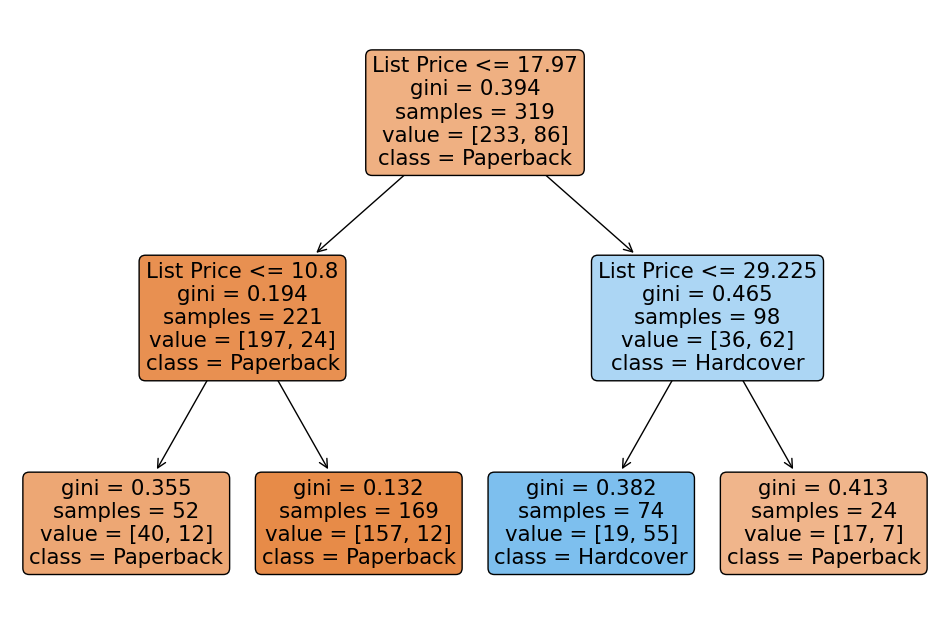

In [13]:
from sklearn import tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, 
               feature_names=['List Price'], 
               class_names=['Paperback', 'Hardcover'], 
               filled=True, 
               rounded=True)
plt.show()



The tree will have a decision rule at each node based on the List Price. For example, it may split on a price threshold: If the List Price is lower the threshold value, the model should predict "Paperback"; otherwise, it  should predict "Hardcover". A book that has a price <=17.97 dollars or >29.475 dollars is predicted as a paperback. If the book has a price >17.97 dollars and <=29.475 dollars, the book is predicted to be hardcover.



ChatGPT summary:

Here’s a summary of our chat:

Data Preprocessing: We worked through steps to load and preprocess the dataset, including removing specific columns (Weight_oz, Width, Height), dropping rows with missing values, and ensuring correct data types for columns like Pub year, NumPages, and Hard_or_Paper.

Exploratory Data Analysis (EDA): You asked for initial data exploration, where we discussed the use of .describe(), .info(), and visualizations like histograms or boxplots to summarize and check for issues like outliers or missing data.

Data Splitting: We split the dataset into training and testing sets using train_test_split() with an 80/20 split. The sizes of the resulting training and testing sets were reported.

Model Setup: We then trained a DecisionTreeClassifier to predict whether a book is hardcover or paperback using List Price as the feature. We set the model's max_depth to 2 to control the tree's complexity.

Plotting the Decision Tree: Finally, we used tree.plot_tree() to visualize the trained decision tree. This plot shows how the tree splits on List Price to predict the book type (hardcover vs. paperback).

Throughout, we also encountered and resolved a few issues related to column names and potential warnings when modifying data.

If you need any further assistance, feel free to ask!

https://chatgpt.com/share/673d8971-5650-8013-a4d6-f0a9bf6ad4a9

# Post-Lecture

Question 5

/tmp/ipykernel_53/3777852814.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_53/3777852814.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_53/3777852814.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

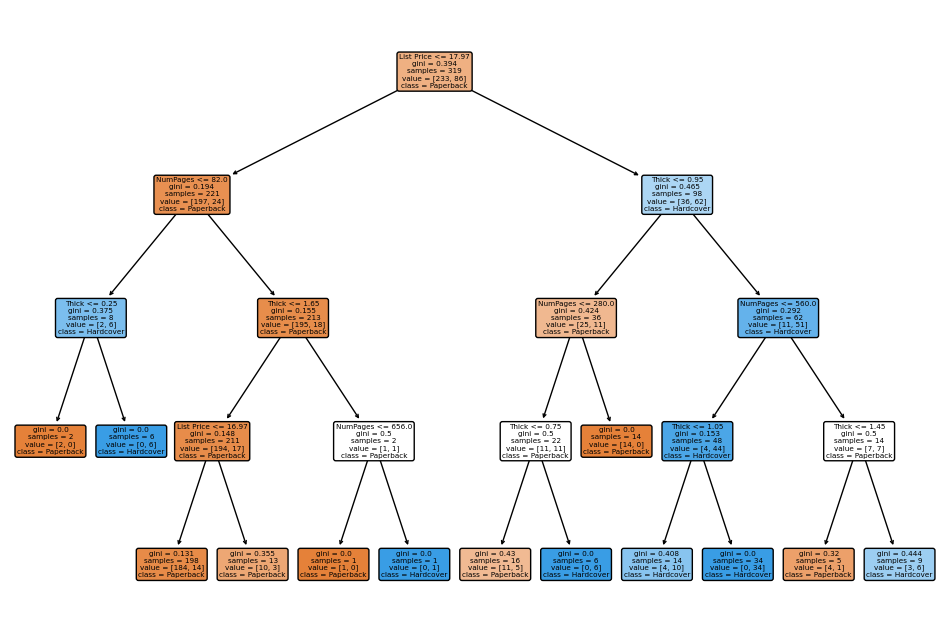

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Drop specified columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna()

# Ensure correct data types
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Define the features (X) and target (y)
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Initialize the DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model
clf2.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf2, 
               feature_names=['NumPages', 'Thick', 'List Price'], 
               class_names=['Paperback', 'Hardcover'], 
               filled=True, 
               rounded=True)
plt.show()



The clf2 decision tree model makes predictions by following decision rules based on the features (like NumPages, Thick, List Price). It splits the data at each node, asking questions like "Is List Price greater than $20?". The tree follows these splits until it reaches a leaf node, which contains the predicted class (e.g., hardcover or paperback). With max_depth=4, the tree has a maximum of 4 levels to prevent overfitting. The model classifies new books by navigating through the tree using their feature values.

Question 6

Model: clf (based on List Price)
Sensitivity: 0.70
Specificity: 0.91
Accuracy: 0.84

Model: clf2 (based on NumPages, Thick, List Price)
Sensitivity: 0.75
Specificity: 0.91
Accuracy: 0.86


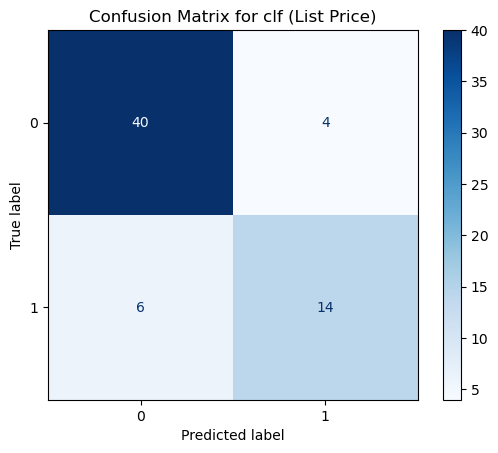

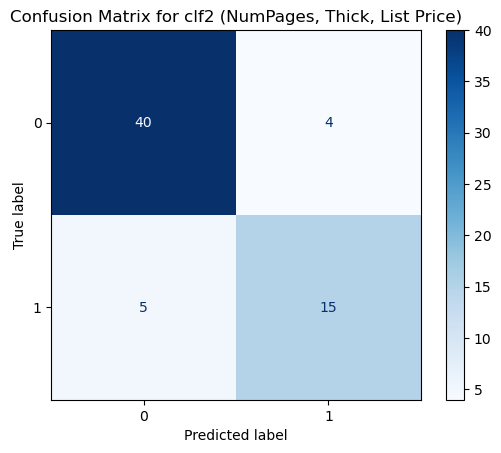

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]  # Features
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target (1 for hardcover, 0 for paperback)

# Split the data into 80/20 training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier for both models with max_depth=4
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the models
clf.fit(X_train[['List Price']], y_train)  # Train clf using 'List Price' only
clf2.fit(X_train[['NumPages', 'Thick', 'List Price']], y_train)  # Train clf2 using 'NumPages', 'Thick', 'List Price'

# Predict using clf (decision tree model for List Price)
y_pred_clf = clf.predict(X_test[['List Price']])

# Predict using clf2 (decision tree model for NumPages, Thick, List Price)
y_pred_clf2 = clf2.predict(X_test[['NumPages', 'Thick', 'List Price']])

# Confusion Matrix for clf
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Sensitivity (Recall)
sensitivity_clf = recall_score(y_test, y_pred_clf)
sensitivity_clf2 = recall_score(y_test, y_pred_clf2)

# Specificity (True Negative Rate)
specificity_clf = cm_clf[0, 0] / (cm_clf[0, 0] + cm_clf[0, 1])
specificity_clf2 = cm_clf2[0, 0] / (cm_clf2[0, 0] + cm_clf2[0, 1])

# Accuracy
accuracy_clf = accuracy_score(y_test, y_pred_clf)
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)

# Print results
print("Model: clf (based on List Price)")
print(f"Sensitivity: {sensitivity_clf:.2f}")
print(f"Specificity: {specificity_clf:.2f}")
print(f"Accuracy: {accuracy_clf:.2f}\n")

print("Model: clf2 (based on NumPages, Thick, List Price)")
print(f"Sensitivity: {sensitivity_clf2:.2f}")
print(f"Specificity: {specificity_clf2:.2f}")
print(f"Accuracy: {accuracy_clf2:.2f}")

# Plot Confusion Matrix for clf
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf)
disp_clf.plot(cmap='Blues')
plt.title('Confusion Matrix for clf (List Price)')
plt.show()

# Plot Confusion Matrix for clf2
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2)
disp_clf2.plot(cmap='Blues')
plt.title('Confusion Matrix for clf2 (NumPages, Thick, List Price)')
plt.show()


Question 7

The two confusion matrices from this question are based on the training data, which can lead to overfitting, meaning the model might perform well on this data but not generalize as effectively to new, unseen data. The earlier confusion matrices for clf and clf2 were based on the test data, which provides a more accurate reflection of the model's performance on data it hasn't seen before. Additionally, the second confusion matrix (using NumPages, Thick, and List Price) benefits from more features, likely leading to better model performance compared to the simpler model using just List Price. Overall, test data confusion matrices offer a more realistic evaluation, while training data matrices tend to show inflated performance metrics due to overfitting.

Question 8

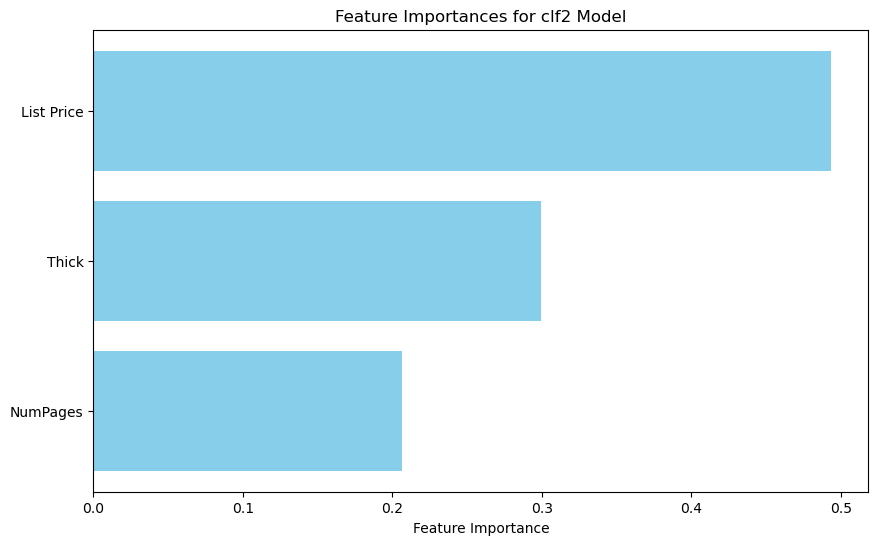

Most important feature: List Price


In [11]:
from sklearn.tree import DecisionTreeClassifier

# Fit the clf2 model with 'NumPages', 'Thick', and 'List Price' as features
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)

# Now you can run the feature importance visualization code
importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances for clf2 Model')
plt.show()

# Report the most important feature
most_important_feature = feature_names[importances.argmax()]
print("Most important feature:", most_important_feature)


Question 9

In linear regression, coefficients directly represent the magnitude and direction of the relationship between each predictor variable and the target variable, with positive or negative values indicating the type of effect (increasing or decreasing). In decision trees, feature importances indicate how much a feature contributes to reducing uncertainty or improving model accuracy at each split, but they do not provide direct interpretation of the feature’s effect on the target variable. While linear regression coefficients are interpretable in terms of the effect size, decision tree feature importances are relative and show which features are more influential in the overall decision-making process.

Question 10

Mostly 

ChatGPT summary:

In our conversation, we discussed a variety of machine learning concepts and tasks, focusing on classification decision trees using scikit-learn. You shared a dataset (amazon books), and we preprocessed it by handling missing data, adjusting data types, and splitting it into training and test sets. We built decision tree models (clf and clf2) to predict whether a book is a hardcover or paperback using different feature sets. We visualized decision trees and evaluated model performance using confusion matrices and metrics such as accuracy, sensitivity, and specificity. We also explored feature importance in decision trees, discussed the interpretation of decision tree results versus linear regression coefficients, and considered how each feature contributes to model predictions.

https://chatgpt.com/share/673d8971-5650-8013-a4d6-f0a9bf6ad4a9